# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [1]:
# Run this to use from colab environment

import zipfile
import os
import pandas as pd

#with zipfile.ZipFile('ecg_data.zip', 'r') as zip_ref: #TODO: let hierop voor inleveren
#    zip_ref.extractall('ecg')

data = pd.read_csv('ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

data.head()

The number of samples: 827
The number of columns: 9001


,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,11_741,11_742,11_743,11_744,11_745,11_746,11_747,11_748,11_749,label
0,47.685046,48.416904,37.371002,61.604757,58.732738,213.067966,120.890451,40.100639,19.106303,6.043738,...,0.078753,0.379885,0.182930,0.231552,0.222432,0.154919,0.158616,0.269249,0.112248,0
1,152.726718,297.353726,111.168880,25.419423,14.636085,24.609688,49.533842,253.651571,483.852043,167.617409,...,0.804160,0.809705,0.830032,0.774368,0.798178,0.853519,0.827946,0.859936,0.742673,1
2,1.601260,3.882169,22.978997,21.673040,8.919484,18.329286,27.710604,23.350084,37.896254,8.331180,...,0.156080,0.102070,0.168276,0.120385,0.064254,0.077670,0.059857,0.098506,0.098288,0
3,1.388947,3.052483,3.084103,4.627886,10.016196,15.020347,139.823127,20.149108,10.393109,9.241921,...,0.238274,0.096733,0.030739,0.170214,0.052079,0.179360,0.226222,0.092000,0.192559,0
4,3.625561,3.728466,6.205367,17.722897,5.699401,9.024836,15.782812,33.336480,55.257804,19.139128,...,0.056914,0.059116,0.050098,0.152588,0.129712,0.047342,0.058446,0.141610,0.129477,0


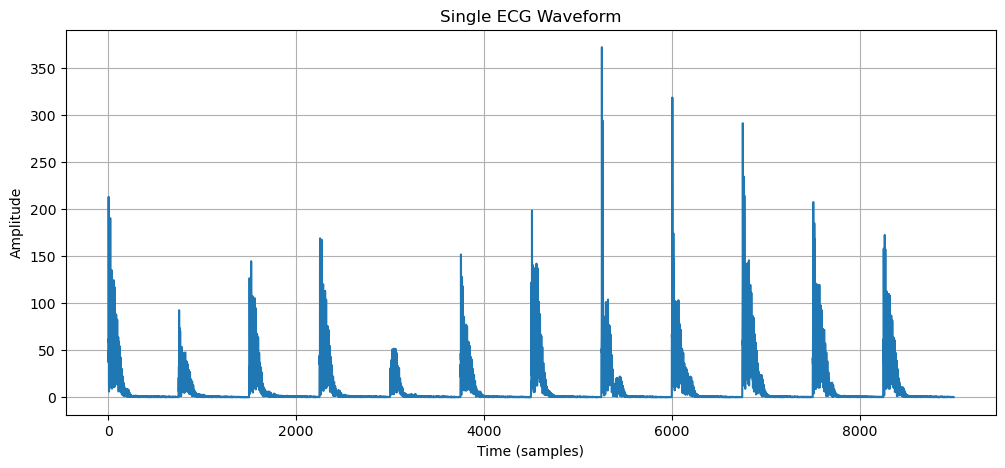

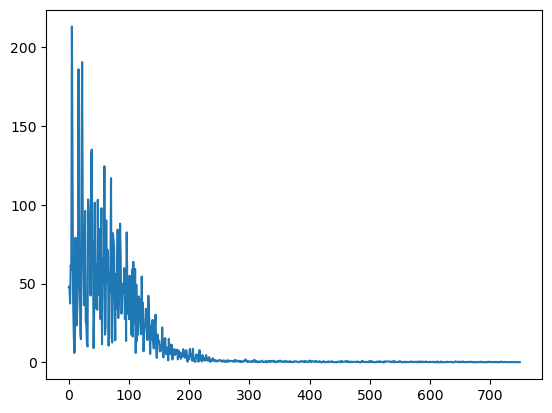

In [5]:
import matplotlib.pyplot as plt

# Select the first row (single ECG waveform)
sample_ecg = data.iloc[0, :-1]  # Exclude index and label

# Plot the ECG waveform
plt.figure(figsize=(12, 5))  # Set figure size
plt.plot(sample_ecg.values)  # Plot the data
plt.title('Single ECG Waveform')  # Add title
plt.xlabel('Time (samples)')  # Label for x-axis
plt.ylabel('Amplitude')  # Label for y-axis
plt.grid(True)  # Add grid for better readability
plt.show()

plt.plot(sample_ecg.values[:750])
plt.show()

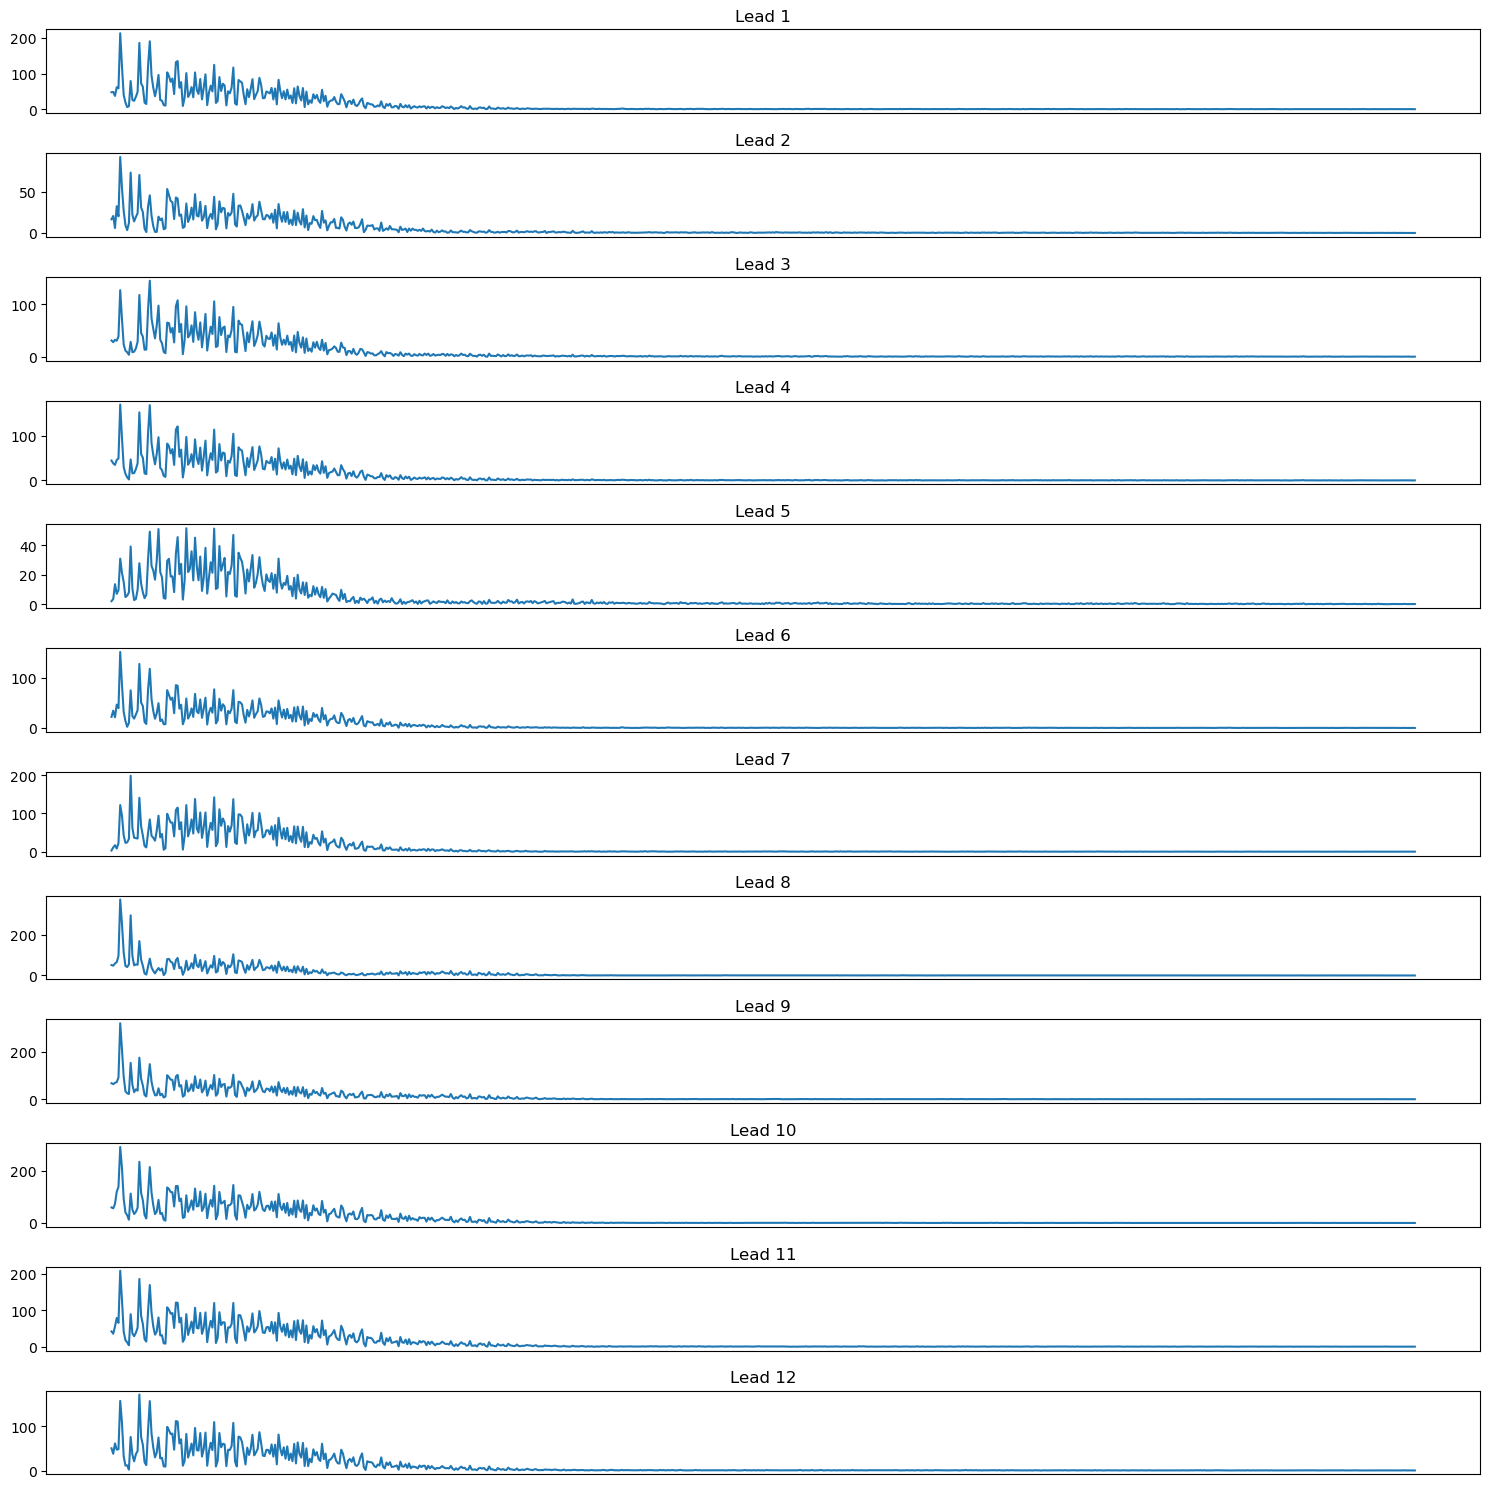

In [4]:
num_leads = 12
lead_size = 750

fig, axes = plt.subplots(num_leads, 1, figsize=(15, 15))
axes = axes.flatten()

# Loop through each lead
for i, ax in enumerate(axes):
    lead_start = i * lead_size       # Calculate the start index of the lead
    lead_end = (i + 1) * lead_size  # Calculate the end index of the lead
    lead = sample_ecg[lead_start:lead_end]  # Extract the lead data

    ax.plot(lead)  # Plot the lead
    ax.set_title(f'Lead {i+1}')  # Add title

    # Remove x-axis ticks and labels
    ax.set_xticks([])
    ax.set_xticklabels([])

plt.tight_layout()  # Adjust the subplots to fit into the figure
plt.show()